In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import pde_opt
from pde_opt.model import OptimizationModel
from pde_opt.numerics.equations import CahnHilliardSIFFT
from pde_opt.numerics.solvers import SemiImplicitFourierSpectral
from pde_opt.numerics.domains import Domain
from pde_opt.numerics.functions import (
    DiffusionLegendrePolynomials,
    ChemicalPotentialLegendrePolynomials,
)

import equinox as eqx
import diffrax

In [2]:
Nx = Ny = 128
Lx = Ly = 0.01 * 128

domain = Domain(
    (Nx, Ny),
    (
        (-Lx / 2, Lx / 2),
        (-Ly / 2, Ly / 2),
    ),
    "dimensionless",
)

In [3]:
opt_model = OptimizationModel(
    equation_type=CahnHilliardSIFFT,
    domain=domain,
    solver_type=SemiImplicitFourierSpectral,
)

In [4]:
params = {
    "kappa": 0.002,
    "mu": ChemicalPotentialLegendrePolynomials(
        jnp.array([0.0, -3.0]), lambda x: jnp.log(x / (1.0 - x))
    ),
    "D": DiffusionLegendrePolynomials(jnp.array([0.0])),
}

# params = {"kappa": 0.002, "mu": lambda c: jnp.log(c / (1.0 - c)) + 3.0 * (1.0 - 2.0 * c), "D": lambda c: (1.0 - c) * c}

solver_params = {"A": 0.5}

key = jax.random.PRNGKey(0)
y0 = jnp.clip(0.01 * jax.random.normal(key, (Nx, Ny)) + 0.5, 0.0, 1.0)
ts = jnp.linspace(0.0, 0.02, 100)
print(y0.shape)

(128, 128)


In [5]:
sol = opt_model.solve(params, y0, ts, solver_params, dt0=0.000001, max_steps=1000000)

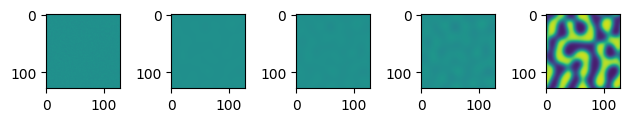

In [6]:
fig, ax = plt.subplots(1, 5)
ax[0].imshow(sol[0], vmin=0.0, vmax=1.0)
ax[1].imshow(sol[10], vmin=0.0, vmax=1.0)
ax[2].imshow(sol[20], vmin=0.0, vmax=1.0)
ax[3].imshow(sol[30], vmin=0.0, vmax=1.0)
ax[4].imshow(sol[-1], vmin=0.0, vmax=1.0)
plt.tight_layout()
plt.show()

In [24]:
data = {}
data['ys'] = sol
data['ts'] = ts

inds = [[30,40,50], [50,60,70], [70,80,90]]

init_params = {
    "kappa": 0.002,
    "mu": ChemicalPotentialLegendrePolynomials(
        jnp.array([0.0, -2.0]), lambda x: jnp.log(x / (1.0 - x))
    ),
    "D": DiffusionLegendrePolynomials(jnp.array([0.0])),
}

weights = {
    "kappa": 0.0,
    "mu": ChemicalPotentialLegendrePolynomials(jnp.array([0.0, 0.0])),
    "D": None,
}


In [25]:
res = opt_model.train(data, inds, init_params, solver_params, weights, 1.0)

Step: 0, Accepted steps: 0, Steps since acceptance: 0, Loss on this step: 1328.313232421875, Loss on the last accepted step: 0.0, Step size: 1.0
Step: 1, Accepted steps: 1, Steps since acceptance: 0, Loss on this step: nan, Loss on the last accepted step: 1328.313232421875, Step size: 0.25
Step: 2, Accepted steps: 1, Steps since acceptance: 1, Loss on this step: nan, Loss on the last accepted step: 1328.313232421875, Step size: 0.0625
Step: 3, Accepted steps: 1, Steps since acceptance: 2, Loss on this step: nan, Loss on the last accepted step: 1328.313232421875, Step size: 0.015625
Step: 4, Accepted steps: 1, Steps since acceptance: 3, Loss on this step: nan, Loss on the last accepted step: 1328.313232421875, Step size: 0.00390625
Step: 5, Accepted steps: 1, Steps since acceptance: 4, Loss on this step: nan, Loss on the last accepted step: 1328.313232421875, Step size: 0.0009765625
Step: 6, Accepted steps: 1, Steps since acceptance: 5, Loss on this step: 354.9799499511719, Loss on the 

In [27]:
print(res['mu'].expansion.params)
print(res['D'])

[ 0. -3.]
<function <lambda> at 0x14831488a200>
